In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor 

In [2]:
train_df = pd.read_csv("Train.csv")
validation_df = pd.read_csv("validation.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           3414 non-null   object 
 1   RAM           3414 non-null   object 
 2   Storage       3414 non-null   object 
 3   GPU           3414 non-null   object 
 4   ScreenSize    3414 non-null   object 
 5   ScreenType    3414 non-null   object 
 6   TouchType     3414 non-null   object 
 7   Form          3414 non-null   object 
 8   Region        3414 non-null   object 
 9   Price in INR  3414 non-null   float64
dtypes: float64(1), object(9)
memory usage: 266.8+ KB


In [4]:
train_df['Price in INR'] = train_df['Price in INR'].apply(lambda x:'{:.2f}'.format(x))
train_df['Price in INR'] = train_df['Price in INR'].map(lambda x: float(x))
train_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,CPU 20,RAM 7,S 56,GPU 26,15,FHD,Non-Touch,Laptop,IND,187998.43
1,CPU 42,RAM 16,S 23,GPU 28,15,HD+,Non-Touch,Laptop,AUS,43648.61
2,CPU 20,RAM 15,S 52,GPU 19,17,FHD,Non-Touch,Laptop,IND,121702.84
3,CPU 20,RAM 3,S 7,GPU 19,15,FHD,Non-Touch,Laptop,IND,132800.98
4,CPU 25,RAM 15,S 54,GPU 19,DT,DT,DT,Desktop,AUS,66139.50
...,...,...,...,...,...,...,...,...,...,...
3409,CPU 20,RAM 15,S 23,GPU 28,14,HD+,Non-Touch,Laptop,CHN,1677273.70
3410,CPU 6,RAM 15,S 23,GPU 27,DT,DT,DT,Desktop,FRA,1351325.43
3411,CPU 20,RAM 7,S 23,GPU 14,15,FHD,Non-Touch,Laptop,FRA,4909775.45
3412,CPU 20,RAM 7,S 70,GPU 14,DT,DT,DT,Desktop,GBR,3222495.30


In [5]:
validation_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,CPU 20,RAM 15,S 41,GPU 28,14,HD,Non-Touch,Laptop,CHN,63332.892
1,CPU 10,RAM 3,S 41,GPU 19,15,FHD,Non-Touch,Laptop,FRA,77139.335
2,CPU 25,RAM 15,S 23,GPU 26,15,FHD,Non-Touch,Laptop,FRA,111299.300
3,CPU 20,RAM 16,S 53,GPU 28,17,FHD,Touch,Laptop,FRA,62369.307
4,CPU 25,RAM 15,S 42,GPU 28,DT,DT,DT,Desktop,FRA,39269.286
...,...,...,...,...,...,...,...,...,...,...
524,CPU 25,RAM 15,S 41,GPU 28,12,HD+,Touch,Laptop,AUS,76429.080
525,CPU 20,RAM 15,S 41,GPU 14,15,FHD,Non-Touch,Laptop,IND,121705.318
526,CPU 12,RAM 3,S 31,GPU 9,DT,DT,DT,Desktop,FRA,67164.293
527,CPU 25,RAM 13,S 4,GPU 28,15,FHD,Non-Touch,Laptop,AUS,44236.710


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           3414 non-null   object 
 1   RAM           3414 non-null   object 
 2   Storage       3414 non-null   object 
 3   GPU           3414 non-null   object 
 4   ScreenSize    3414 non-null   object 
 5   ScreenType    3414 non-null   object 
 6   TouchType     3414 non-null   object 
 7   Form          3414 non-null   object 
 8   Region        3414 non-null   object 
 9   Price in INR  3414 non-null   float64
dtypes: float64(1), object(9)
memory usage: 266.8+ KB


In [7]:
train_df['CPU'] = train_df['CPU'].str.split(' ').str[1] 
train_df['Storage'] = train_df['Storage'].str.split(' ').str[1]
train_df['RAM'] = train_df['RAM'].str.split(' ').str[1] 
train_df['GPU'] = train_df['GPU'].str.split(' ').str[1] 

In [8]:
train_df['CPU'] = train_df['CPU'].astype(int)
train_df['Storage'] = train_df['Storage'].astype(int)
train_df['RAM'] = train_df['RAM'].astype(int)
train_df['GPU'] = train_df['GPU'].astype(int)

In [9]:
train_df['ScreenSize'] = train_df['ScreenSize'].replace('DT', np.nan)
train_df['ScreenSize'] = train_df['ScreenSize'].astype(float)
mean_value = train_df['ScreenSize'].mean()
train_df['ScreenSize'].fillna(value = mean_value,inplace = True)


In [10]:
train_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,20,7,56,26,15.000000,FHD,Non-Touch,Laptop,IND,187998.43
1,42,16,23,28,15.000000,HD+,Non-Touch,Laptop,AUS,43648.61
2,20,15,52,19,17.000000,FHD,Non-Touch,Laptop,IND,121702.84
3,20,3,7,19,15.000000,FHD,Non-Touch,Laptop,IND,132800.98
4,25,15,54,19,15.276206,DT,DT,Desktop,AUS,66139.50
...,...,...,...,...,...,...,...,...,...,...
3409,20,15,23,28,14.000000,HD+,Non-Touch,Laptop,CHN,1677273.70
3410,6,15,23,27,15.276206,DT,DT,Desktop,FRA,1351325.43
3411,20,7,23,14,15.000000,FHD,Non-Touch,Laptop,FRA,4909775.45
3412,20,7,70,14,15.276206,DT,DT,Desktop,GBR,3222495.30


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           3414 non-null   int64  
 1   RAM           3414 non-null   int64  
 2   Storage       3414 non-null   int64  
 3   GPU           3414 non-null   int64  
 4   ScreenSize    3414 non-null   float64
 5   ScreenType    3414 non-null   object 
 6   TouchType     3414 non-null   object 
 7   Form          3414 non-null   object 
 8   Region        3414 non-null   object 
 9   Price in INR  3414 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 266.8+ KB


<AxesSubplot:xlabel='ScreenSize', ylabel='Price in INR'>

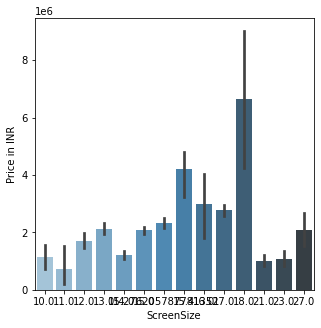

In [12]:
plt.subplots(figsize=(5,5))
sns.barplot(x='ScreenSize', y='Price in INR', data = train_df, palette="Blues_d")

<AxesSubplot:xlabel='Region', ylabel='Price in INR'>

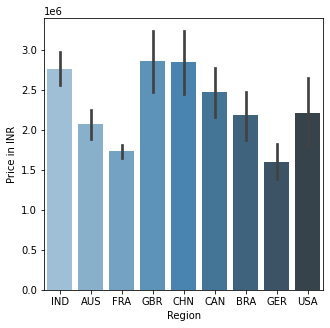

In [13]:
plt.subplots(figsize=(5,5))
sns.barplot(x='Region', y='Price in INR', data = train_df, palette="Blues_d")

<AxesSubplot:xlabel='ScreenType', ylabel='Price in INR'>

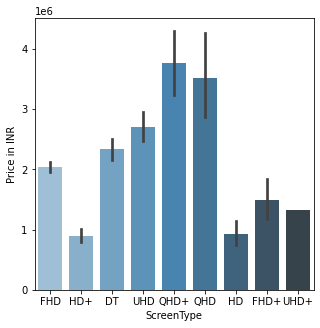

In [14]:
plt.subplots(figsize=(5,5))
sns.barplot(x='ScreenType', y='Price in INR', data = train_df, palette="Blues_d")

<AxesSubplot:xlabel='RAM', ylabel='Price in INR'>

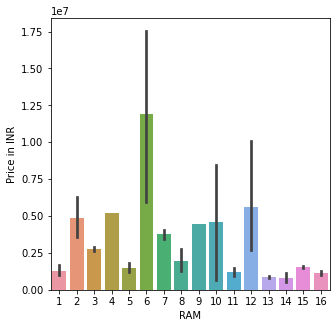

In [15]:
plt.subplots(figsize=(5,5))
sns.barplot(x='RAM', y='Price in INR', data = train_df)

<AxesSubplot:xlabel='Storage', ylabel='Price in INR'>

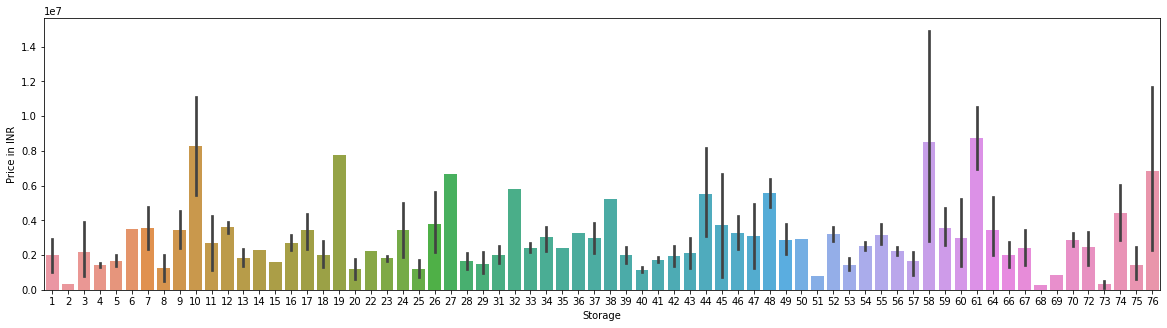

In [16]:
plt.subplots(figsize=(20,5))
sns.barplot(x='Storage', y='Price in INR', data = train_df)

<AxesSubplot:xlabel='ScreenSize', ylabel='Price in INR'>

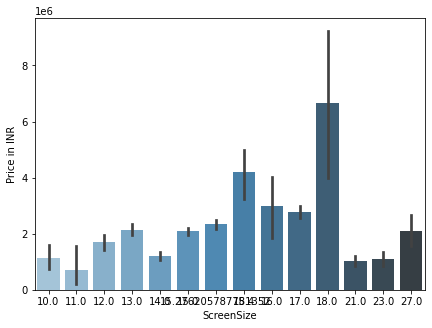

In [17]:
plt.subplots(figsize=(7,5))
sns.barplot(x='ScreenSize', y='Price in INR', data = train_df,  palette="Blues_d")

In [18]:
train_df['Form'].value_counts()

Laptop     2345
Desktop    1040
0            29
Name: Form, dtype: int64

In [19]:
train_df.drop(train_df.index[train_df['Form'] == '0'], inplace = True)


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3385 entries, 0 to 3413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           3385 non-null   int64  
 1   RAM           3385 non-null   int64  
 2   Storage       3385 non-null   int64  
 3   GPU           3385 non-null   int64  
 4   ScreenSize    3385 non-null   float64
 5   ScreenType    3385 non-null   object 
 6   TouchType     3385 non-null   object 
 7   Form          3385 non-null   object 
 8   Region        3385 non-null   object 
 9   Price in INR  3385 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 290.9+ KB


In [21]:
train_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,20,7,56,26,15.000000,FHD,Non-Touch,Laptop,IND,187998.43
1,42,16,23,28,15.000000,HD+,Non-Touch,Laptop,AUS,43648.61
2,20,15,52,19,17.000000,FHD,Non-Touch,Laptop,IND,121702.84
3,20,3,7,19,15.000000,FHD,Non-Touch,Laptop,IND,132800.98
4,25,15,54,19,15.276206,DT,DT,Desktop,AUS,66139.50
...,...,...,...,...,...,...,...,...,...,...
3409,20,15,23,28,14.000000,HD+,Non-Touch,Laptop,CHN,1677273.70
3410,6,15,23,27,15.276206,DT,DT,Desktop,FRA,1351325.43
3411,20,7,23,14,15.000000,FHD,Non-Touch,Laptop,FRA,4909775.45
3412,20,7,70,14,15.276206,DT,DT,Desktop,GBR,3222495.30


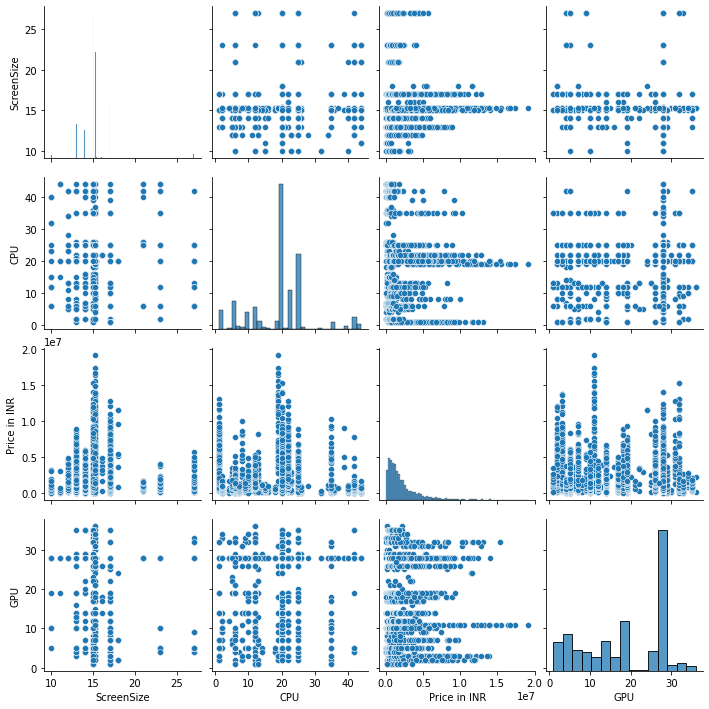

In [22]:
sns.pairplot(train_df[['ScreenSize','CPU', 'Price in INR','GPU','Region']])
plt.show()

In [23]:
'''Touch_type = pd.get_dummies(train_df['TouchType'])
Region_ = pd.get_dummies(train_df['Region'])
Screen_Type = pd.get_dummies(train_df['ScreenType'])
Form_ = pd.get_dummies(train_df['Form'])'''

"Touch_type = pd.get_dummies(train_df['TouchType'])\nRegion_ = pd.get_dummies(train_df['Region'])\nScreen_Type = pd.get_dummies(train_df['ScreenType'])\nForm_ = pd.get_dummies(train_df['Form'])"

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

print(train_df['TouchType'].unique())
print(le.fit_transform(train_df['TouchType'].unique()))
train_df['TouchType']=le.fit_transform(train_df['TouchType'])


print(train_df['Form'].unique())
print(le.fit_transform(train_df['Form'].unique()))
train_df['Form']=le.fit_transform(train_df['Form'])


print(train_df['ScreenType'].unique())
print(le.fit_transform(train_df['ScreenType'].unique()))
train_df['ScreenType']=le.fit_transform(train_df['ScreenType'])


print(train_df['Region'].unique())
print(le.fit_transform(train_df['Region'].unique()))
train_df['Region']=le.fit_transform(train_df['Region'])


['Non-Touch' 'DT' 'Touch']
[1 0 2]
['Laptop' 'Desktop']
[1 0]
['FHD' 'HD+' 'DT' 'UHD' 'QHD+' 'QHD' 'HD' 'FHD+' 'UHD+']
[1 4 0 7 6 5 3 2 8]
['IND' 'AUS' 'FRA' 'GBR' 'CHN' 'CAN' 'BRA' 'GER' 'USA']
[7 0 4 5 3 2 1 6 8]


In [25]:
#train_df = pd.concat([train_df,TouchType,Form,ScreenType,Region], axis=1)

In [26]:
#train_df.drop(columns=['ScreenType','Region','TouchType','Form'],inplace=True)

In [27]:
train_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,20,7,56,26,15.000000,1,1,1,7,187998.43
1,42,16,23,28,15.000000,4,1,1,0,43648.61
2,20,15,52,19,17.000000,1,1,1,7,121702.84
3,20,3,7,19,15.000000,1,1,1,7,132800.98
4,25,15,54,19,15.276206,0,0,0,0,66139.50
...,...,...,...,...,...,...,...,...,...,...
3409,20,15,23,28,14.000000,4,1,1,3,1677273.70
3410,6,15,23,27,15.276206,0,0,0,4,1351325.43
3411,20,7,23,14,15.000000,1,1,1,4,4909775.45
3412,20,7,70,14,15.276206,0,0,0,5,3222495.30


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3385 entries, 0 to 3413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           3385 non-null   int64  
 1   RAM           3385 non-null   int64  
 2   Storage       3385 non-null   int64  
 3   GPU           3385 non-null   int64  
 4   ScreenSize    3385 non-null   float64
 5   ScreenType    3385 non-null   int64  
 6   TouchType     3385 non-null   int64  
 7   Form          3385 non-null   int64  
 8   Region        3385 non-null   int64  
 9   Price in INR  3385 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 290.9 KB


In [29]:
train_df['Price'] = train_df['Price in INR']
train_df.drop(columns=['Price in INR'],inplace = True)
train_df


,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price
0,20,7,56,26,15.000000,1,1,1,7,187998.43
1,42,16,23,28,15.000000,4,1,1,0,43648.61
2,20,15,52,19,17.000000,1,1,1,7,121702.84
3,20,3,7,19,15.000000,1,1,1,7,132800.98
4,25,15,54,19,15.276206,0,0,0,0,66139.50
...,...,...,...,...,...,...,...,...,...,...
3409,20,15,23,28,14.000000,4,1,1,3,1677273.70
3410,6,15,23,27,15.276206,0,0,0,4,1351325.43
3411,20,7,23,14,15.000000,1,1,1,4,4909775.45
3412,20,7,70,14,15.276206,0,0,0,5,3222495.30


In [30]:
validation_df['CPU'] = validation_df['CPU'].str.split(' ').str[1] 
validation_df['Storage'] = validation_df['Storage'].str.split(' ').str[1]
validation_df['RAM'] = validation_df['RAM'].str.split(' ').str[1] 
validation_df['GPU'] = validation_df['GPU'].str.split(' ').str[1] 

 
validation_df['CPU'] = validation_df['CPU'].astype(int)
validation_df['Storage'] = validation_df['Storage'].astype(int)
validation_df['RAM'] = validation_df['RAM'].astype(int)
validation_df['GPU'] = validation_df['GPU'].astype(int)

validation_df['ScreenSize'] = validation_df['ScreenSize'].replace('DT', np.nan)
validation_df['ScreenSize'] = validation_df['ScreenSize'].astype(float)
mean_value = validation_df['ScreenSize'].mean()
validation_df['ScreenSize'].fillna(value = mean_value,inplace = True)

validation_df.drop(validation_df[validation_df['CPU'] <= 0].index, inplace = True)

'''Touch_type = pd.get_dummies(validation_df['TouchType'])
Region_ = pd.get_dummies(validation_df['Region'])
Screen_Type = pd.get_dummies(validation_df['ScreenType'])
Form_ = pd.get_dummies(validation_df['Form'])

validation_df = pd.concat([validation_df,Touch_type,Form_,Screen_Type,Region_], axis=1)

validation_df.drop(columns=['ScreenType','Region','TouchType','Form'],inplace=True)'''
print(validation_df['TouchType'].unique())
print(le.fit_transform(validation_df['TouchType'].unique()))
validation_df['TouchType']=le.fit_transform(validation_df['TouchType'])


print(validation_df['Form'].unique())
print(le.fit_transform(validation_df['Form'].unique()))
validation_df['Form']=le.fit_transform(validation_df['Form'])


print(validation_df['ScreenType'].unique())
print(le.fit_transform(validation_df['ScreenType'].unique()))
validation_df['ScreenType']=le.fit_transform(validation_df['ScreenType'])


print(validation_df['Region'].unique())
print(le.fit_transform(validation_df['Region'].unique()))
validation_df['Region']=le.fit_transform(validation_df['Region'])


              
validation_df['Price'] = validation_df['Price in INR']
validation_df.drop(columns=['Price in INR'],inplace = True)
validation_df
              
              

['Non-Touch' 'Touch' 'DT']
[1 2 0]
['Laptop' 'Desktop']
[1 0]
['HD' 'FHD' 'DT' 'UHD' 'QHD' 'FHD+' 'QHD+' 'HD+' 'UHD+']
[3 1 0 7 5 2 6 4 8]
['CHN' 'FRA' 'IND' 'CAN' 'AUS' 'BRA' 'GBR' 'USA' 'GER']
[3 4 7 2 0 1 5 8 6]


,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price
0,20,15,41,28,14.000000,3,1,1,3,63332.892
1,10,3,41,19,15.000000,1,1,1,4,77139.335
2,25,15,23,26,15.000000,1,1,1,4,111299.300
3,20,16,53,28,17.000000,1,2,1,4,62369.307
4,25,15,42,28,15.218045,0,0,0,4,39269.286
...,...,...,...,...,...,...,...,...,...,...
524,25,15,41,28,12.000000,4,2,1,0,76429.080
525,20,15,41,14,15.000000,1,1,1,7,121705.318
526,12,3,31,9,15.218045,0,0,0,4,67164.293
527,25,13,4,28,15.000000,1,1,1,0,44236.710


In [31]:
target = train_df['Price']
train_df.drop(columns=['Price'], inplace = True)
pd.set_option('display.max_columns', None)
train_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region
0,20,7,56,26,15.000000,1,1,1,7
1,42,16,23,28,15.000000,4,1,1,0
2,20,15,52,19,17.000000,1,1,1,7
3,20,3,7,19,15.000000,1,1,1,7
4,25,15,54,19,15.276206,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3409,20,15,23,28,14.000000,4,1,1,3
3410,6,15,23,27,15.276206,0,0,0,4
3411,20,7,23,14,15.000000,1,1,1,4
3412,20,7,70,14,15.276206,0,0,0,5


In [32]:
target_x = validation_df['Price']
validation_df.drop(columns=['Price'], inplace = True)
pd.set_option('display.max_columns', None)
validation_df

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region
0,20,15,41,28,14.000000,3,1,1,3
1,10,3,41,19,15.000000,1,1,1,4
2,25,15,23,26,15.000000,1,1,1,4
3,20,16,53,28,17.000000,1,2,1,4
4,25,15,42,28,15.218045,0,0,0,4
...,...,...,...,...,...,...,...,...,...
524,25,15,41,28,12.000000,4,2,1,0
525,20,15,41,14,15.000000,1,1,1,7
526,12,3,31,9,15.218045,0,0,0,4
527,25,13,4,28,15.000000,1,1,1,0


In [33]:
test_df['CPU'] = test_df['CPU'].str.split(' ').str[1] 
test_df['Storage'] = test_df['Storage'].str.split(' ').str[1]
test_df['RAM'] = test_df['RAM'].str.split(' ').str[1] 
test_df['GPU'] = test_df['GPU'].str.split(' ').str[1] 

 
test_df['CPU'] = test_df['CPU'].astype(int)
test_df['Storage'] = test_df['Storage'].astype(int)
test_df['RAM'] = test_df['RAM'].astype(int)
test_df['GPU'] = test_df['GPU'].astype(int)

test_df['ScreenSize'] = test_df['ScreenSize'].replace('DT', np.nan)
test_df['ScreenSize'] = test_df['ScreenSize'].astype(float)
mean_value = test_df['ScreenSize'].mean()
test_df['ScreenSize'].fillna(value = mean_value,inplace = True)

test_df.drop(test_df[test_df['CPU'] <= 0].index, inplace = True)

'''Touch_type = pd.get_dummies(test_df['TouchType'])
Region_ = pd.get_dummies(test_df['Region'])
Screen_Type = pd.get_dummies(test_df['ScreenType'])
Form_ = pd.get_dummies(test_df['Form'])

test_df = pd.concat([test_df,Touch_type,Form_,Screen_Type,Region_], axis=1)

test_df.drop(columns=['ScreenType','Region','TouchType','Form'],inplace=True)'''
print(test_df['TouchType'].unique())
print(le.fit_transform(test_df['TouchType'].unique()))
test_df['TouchType']=le.fit_transform(test_df['TouchType'])


print(test_df['Form'].unique())
print(le.fit_transform(test_df['Form'].unique()))
test_df['Form']=le.fit_transform(test_df['Form'])


print(test_df['ScreenType'].unique())
print(le.fit_transform(test_df['ScreenType'].unique()))
test_df['ScreenType']=le.fit_transform(test_df['ScreenType'])


print(test_df['Region'].unique())
print(le.fit_transform(test_df['Region'].unique()))
test_df['Region']=le.fit_transform(test_df['Region'])



ID_ = test_df['ID']
test_df.drop(columns=['ID'],inplace = True)
              

test_df

['Non-Touch' 'DT' 'Touch']
[1 0 2]
['Laptop' 'Desktop']
[1 0]
['UHD' 'DT' 'HD' 'FHD' 'QHD' 'QHD+' 'HD+' 'FHD+']
[7 0 3 1 5 6 4 2]
['GBR' 'FRA' 'BRA' 'AUS' 'GER' 'IND' 'CAN' 'CHN' 'USA']
[5 4 1 0 6 7 2 3 8]


,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region
0,27,13,41,28,13.000000,7,1,1,5
1,41,3,54,5,15.000000,7,1,1,4
2,27,14,23,28,15.000000,7,1,1,4
3,41,15,41,19,15.257956,0,0,0,1
4,33,1,70,18,15.257956,0,0,0,4
...,...,...,...,...,...,...,...,...,...
821,41,11,4,28,15.000000,1,1,1,0
822,27,15,56,28,13.000000,1,1,1,6
823,31,7,52,8,15.257956,0,0,0,4
824,27,13,23,28,21.000000,7,2,0,4


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.20, random_state=0)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv =3, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
print("Train Accuracy:",rf_random.score(X_train, y_train))
print("Test Accuracy:",rf_random.score(X_test, y_test))
print("Validation Accuracy:",rf_random.score(validation_df, target_x))

Train Accuracy: 0.6331584785480828
Test Accuracy: 0.42248612119643814
Validation Accuracy: -664.1400376635972


In [38]:
best_random = rf_random.best_estimator_
print("Train Accuracy:",best_random.score(X_train, y_train))
print("Test Accuracy:",best_random.score(X_test, y_test))

Train Accuracy: 0.6331584785480828
Test Accuracy: 0.42248612119643814


In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
model_pred = best_random.predict(X_test)
print("R2 score: %.2f"%(r2_score(y_test,model_pred)))
mae = mean_absolute_error(y_test, model_pred)
print("MAE: %.2f"%(mae))

R2 score: 0.42
MAE: 1192998.05


In [40]:
model_pred_v = best_random.predict(validation_df)
print("R2 score: %.2f"%(r2_score(target_x,model_pred_v)))
mae = mean_absolute_error(target_x, model_pred_v)
print("MAE: %.2f"%(mae))

R2 score: -664.14
MAE: 2069943.30


In [41]:
print(best_random)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=10,
                      n_estimators=1600)


In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [43]:
from xgboost import XGBRegressor
model_2 = XGBRegressor()
model_2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
print("Train Accuracy:",model_2.score(X_train, y_train))
print("Test Accuracy:",model_2.score(X_test, y_test))

Train Accuracy: 0.8577997643522666
Test Accuracy: 0.3937849184867901


In [45]:
pred_2=model_2.predict(X_test)

r2score=r2_score(y_test, pred_2)
MAE = mean_absolute_error(y_test, pred_2)

print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))


R2 score: 0.39
MAE: 1220533


In [46]:
model_pred_v1 = best_random.predict(validation_df)
print("R2 score: %.2f"%(r2_score(target_x,model_pred_v1)))
mae = mean_absolute_error(target_x, model_pred_v1)
print("MAE: %.2f"%(mae))

R2 score: -664.14
MAE: 2069943.30


In [50]:
#pred_3=model_2.predict(test_df)
pred_4=best_random.predict(test_df)


In [52]:
print(pred_4)

[1689393.07345967 2854981.69609118 1044304.19567863 1358672.55772267
 2800810.99349108 2761801.08124249 1370641.19421956  934161.39871052
 2430744.51584471 1457507.54206589 1092645.93578596  674925.51462557
 1470482.36045803  837697.55856628  953618.79515872 3993852.82284318
 1390186.62274281 3626280.58145347 1536197.43820419  622370.31818545
 3266686.34495833  806391.94327448  913007.71698878 3551865.86086398
 7059540.49285804 1221476.64103648 1014316.21783624  798535.30233555
 1920835.79428319  672528.4145373  1718857.71850218 1359524.47172817
 1790939.90784354  791154.81503262  915252.39748109 4177696.61499559
  937893.1313915   757308.61610277 6592688.07892067  936962.16733841
 1149863.46987657 3671187.85997364 1017692.55243097  725299.5477682
  789363.01018823  959017.2149145  3056981.81047167  873964.70746011
 3139734.45893168  782269.22755434 1765364.26831785 3725860.75493512
  818255.63146322 1302411.9753876  2144329.16393683 5118606.17007183
 3245206.9427826   969551.18912439 

In [58]:
pred_4 = pd.Series(pred_4)

In [72]:
data

{'ID': [0        1
  1        2
  2        3
  3        4
  4        5
        ... 
  821    822
  822    823
  823    824
  824    825
  825    826
  Name: ID, Length: 826, dtype: int64],
 'Price': [0      1.689393e+06
  1      2.854982e+06
  2      1.044304e+06
  3      1.358673e+06
  4      2.800811e+06
             ...     
  821    9.000293e+05
  822    1.548775e+06
  823    2.410639e+06
  824    1.024033e+06
  825    7.998064e+05
  Length: 826, dtype: float64]}

In [78]:
df['Price'] = np.array(pred_4)
df['ID'] = np.array(ID_)

In [79]:
df

,ID,Price
0,1,1.689393e+06
1,2,2.854982e+06
2,3,1.044304e+06
3,4,1.358673e+06
4,5,2.800811e+06
...,...,...
821,822,9.000293e+05
822,823,1.548775e+06
823,824,2.410639e+06
824,825,1.024033e+06


In [86]:
df.to_csv('result.csv',index=False)
df['Price'] = df['Price'].apply(lambda x:'{:.2f}'.format(x))
df['Price'] = df['Price'].map(lambda x: float(x))

ValueError: Unknown format code 'f' for object of type 'str'

In [84]:
df

,ID,Price
0,1,1689393.07
1,2,2854981.70
2,3,1044304.20
3,4,1358672.56
4,5,2800810.99
...,...,...
821,822,900029.30
822,823,1548774.55
823,824,2410638.71
824,825,1024032.62
